# **PROJECT TITLE : OCULAR DISEASE RECOGNITION USING DEEP LEARNING**

## **INTRODUCTION**:
_Ocular diseases, such as glaucoma, diabetic retinopathy, cataracts, and age-related macular degeneration, are major causes of visual impairment and blindness worldwide. Early detection and timely treatment are critical for preventing vision loss and improving patient outcomes. Traditionally, the diagnosis of these conditions has relied heavily on manual examination by trained ophthalmologists using various imaging modalities like fundus photography, optical coherence tomography (OCT), and fluorescein angiography._ 

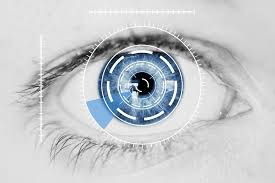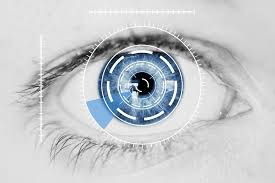

## **DATA SUMMARY**
Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels includingmalities (O)

_1.Normal (N),_

_2.Diabetes (D),_

_3.Glaucoma (G),_

_4.Cataract (C),_

_5.Age related Macular Degeneration (A)_,

_6.Hypertension (H),_

_7.Pathological Myopia (M),_

_8.Other diseases/abnormalities (O)_

## **TASK : MULTICLASS CLASSIFICATION**

## **AIM OF PROJECT**:
_**The primary objective of the ocular disease recognition project is to develop a robust AI-based system capable of accurately identifying various ocular diseases from medical images.**_

### **PYTHON IMPLIMENTATION**

In [ ]:
import numpy as np
import pandas as pd
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')


## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### **LOAD THE DATA**

In [ ]:
df = pd.read_csv("/content/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [ ]:
print(len(cataract),len(normal))

594 500


## **DATA PREPROCESSING**

In [ ]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/OSID Dataset/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [ ]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [02:03<00:00,  4.82it/s] 


588

In [ ]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [03:12<00:00,  2.59it/s]


1088

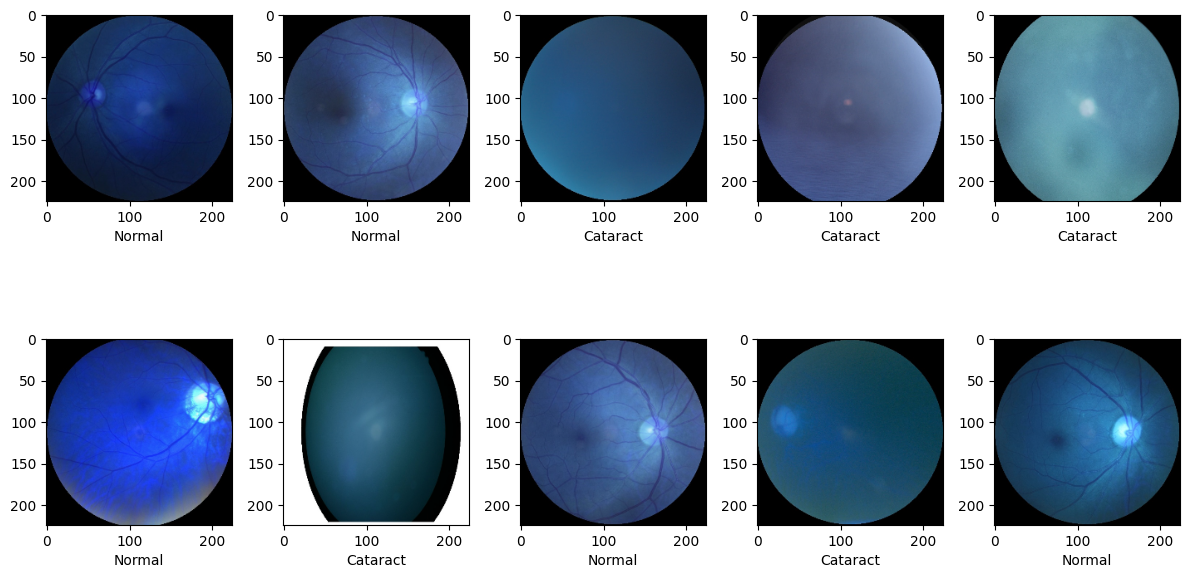

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

## **TRAIN-TEST SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## **USE VGG19 PRE-TRAINED MODEL**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 [==============================] - 0s 0us/step


### **COMPILE AND TRAIN VGG19 MODEL**

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model1 = Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 2.0407 - accuracy: 0.8598

28/28 [==============================] - 26s 588ms/step - loss: 2.0407 - accuracy: 0.8598 - val_loss: 0.8882 - val_accuracy: 0.9404
Epoch 2/10
27/28 [===========================>..] - ETA: 0s - loss: 0.4808 - accuracy: 0.9572

28/28 [==============================] - 5s 179ms/step - loss: 0.4775 - accuracy: 0.9575 - val_loss: 0.3629 - val_accuracy: 0.9541
Epoch 3/10
27/28 [===========================>..] - ETA: 0s - loss: 0.1149 - accuracy: 0.9722

28/28 [==============================] - 5s 181ms/step - loss: 0.1187 - accuracy: 0.9713 - val_loss: 0.5479 - val_accuracy: 0.9587
Epoch 4/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0392 - accuracy: 0.9896

28/28 [==============================] - 5s 181ms/step - loss: 0.0390 - accuracy: 0.9897 - val_loss: 0.5557 - val_accuracy: 0.9587
Epoch 5/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0569 - accuracy: 0.9873

28/28 [==============================] - 5s 169ms/step - loss: 0.0565 - accuracy: 0.9874 - val_loss: 0.4683 - val_accuracy: 0.9404
Epoch 6/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0961 - accuracy: 0.9780

28/28 [==============================] - 5s 183ms/step - loss: 0.0954 - accuracy: 0.9782 - val_loss: 0.4986 - val_accuracy: 0.9633
Epoch 7/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0373 - accuracy: 0.9919

28/28 [==============================] - 5s 183ms/step - loss: 0.0371 - accuracy: 0.9920 - val_loss: 0.3214 - val_accuracy: 0.9679
Epoch 8/10
28/28 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9989

28/28 [==============================] - 5s 174ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 0.4083 - val_accuracy: 0.9725
Epoch 9/10
28/28 [==============================] - ETA: 0s - loss: 2.6418e-04 - accuracy: 1.0000

28/28 [==============================] - 5s 185ms/step - loss: 2.6418e-04 - accuracy: 1.0000 - val_loss: 0.3936 - val_accuracy: 0.9725
Epoch 10/10
28/28 [==============================] - ETA: 0s - loss: 8.4700e-05 - accuracy: 1.0000

28/28 [==============================] - 5s 185ms/step - loss: 8.4700e-05 - accuracy: 1.0000 - val_loss: 0.3891 - val_accuracy: 0.9725


In [ ]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 137ms/step - loss: 0.3891 - accuracy: 0.9725
loss: 0.3891069293022156
Accuracy: 0.9724770784378052


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

7/7 [==============================] - 1s 145ms/step


0.9724770642201835

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.96      0.98      0.97       109

    accuracy                           0.97       218
   macro avg       0.97      0.97      0.97       218
weighted avg       0.97      0.97      0.97       218



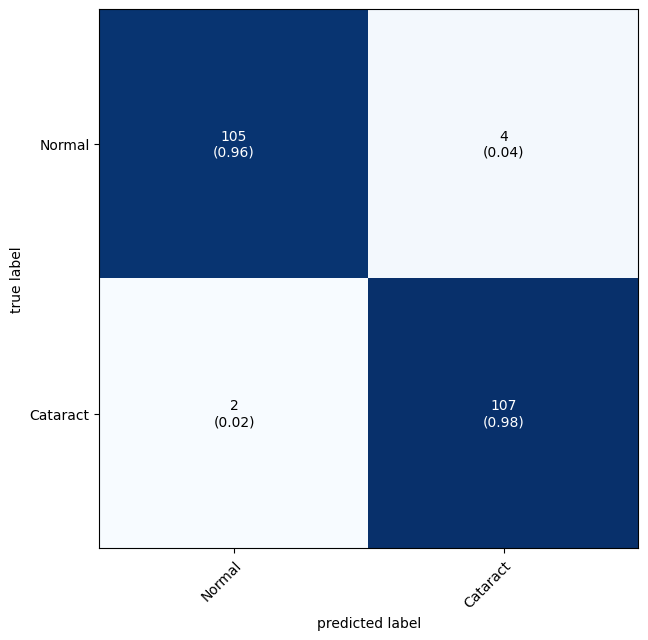

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

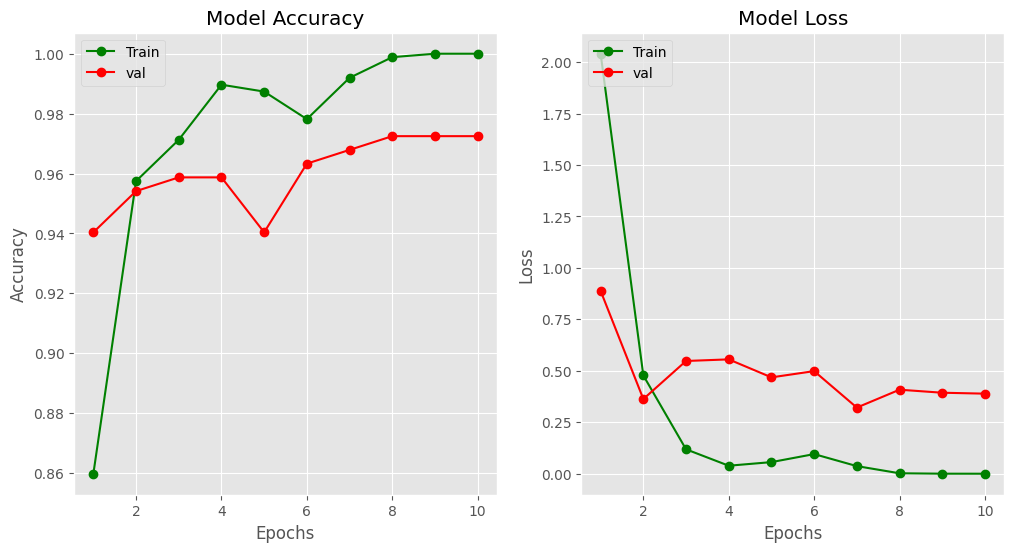

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history1.history["accuracy"],"go-")
plt.plot(epochs,history1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history1.history["loss"],"go-")
plt.plot(epochs,history1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

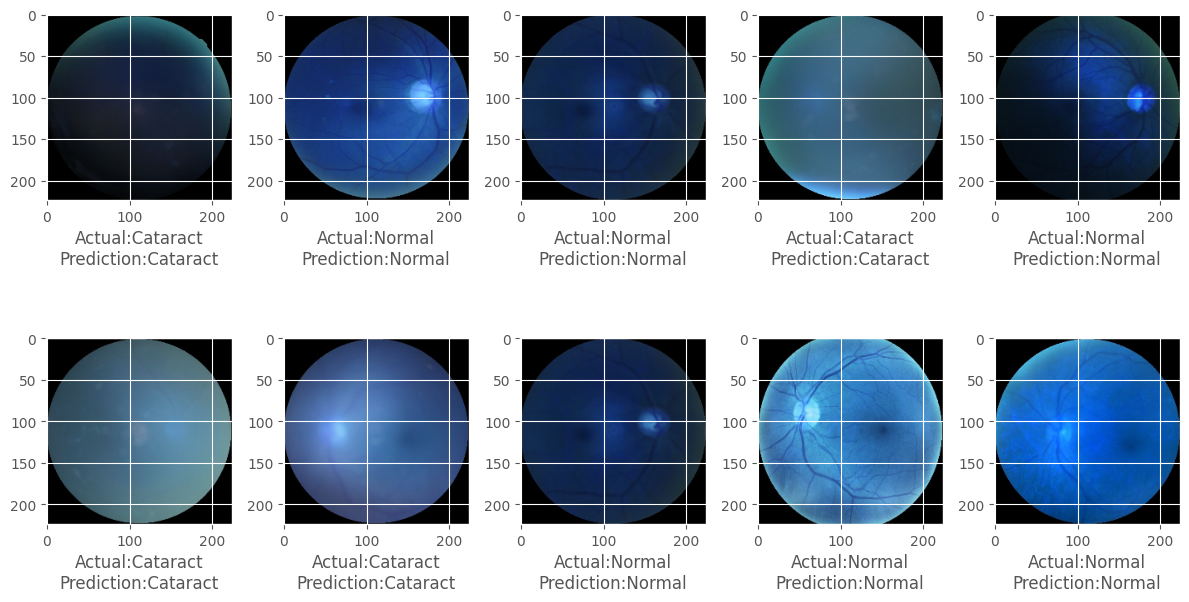

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred1[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## **USE RESNET50 PRE-TRAINED MODEL**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
rnet = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in rnet.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model2 = Sequential()
model2.add(rnet)
model2.add(Flatten())
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 23688065 (90.36 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("rnet50.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 0.8575 - accuracy: 0.9000

28/28 [==============================] - 12s 249ms/step - loss: 0.8575 - accuracy: 0.9000 - val_loss: 0.4529 - val_accuracy: 0.9450
Epoch 2/10
27/28 [===========================>..] - ETA: 0s - loss: 0.1639 - accuracy: 0.9734

28/28 [==============================] - 3s 107ms/step - loss: 0.1628 - accuracy: 0.9736 - val_loss: 0.3990 - val_accuracy: 0.9633
Epoch 3/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0588 - accuracy: 0.9873

28/28 [==============================] - 3s 108ms/step - loss: 0.0584 - accuracy: 0.9874 - val_loss: 0.3119 - val_accuracy: 0.9495
Epoch 4/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0288 - accuracy: 0.9931

28/28 [==============================] - 3s 112ms/step - loss: 0.0286 - accuracy: 0.9931 - val_loss: 0.2224 - val_accuracy: 0.9771
Epoch 5/10
27/28 [===========================>..] - ETA: 0s - loss: 0.0033 - accuracy: 0.9977

28/28 [==============================] - 3s 112ms/step - loss: 0.0033 - accuracy: 0.9977 - val_loss: 0.2242 - val_accuracy: 0.9725
Epoch 6/10
27/28 [===========================>..] - ETA: 0s - loss: 5.9863e-05 - accuracy: 1.0000

28/28 [==============================] - 3s 111ms/step - loss: 5.9471e-05 - accuracy: 1.0000 - val_loss: 0.2164 - val_accuracy: 0.9725
Epoch 7/10
27/28 [===========================>..] - ETA: 0s - loss: 4.6645e-05 - accuracy: 1.0000

28/28 [==============================] - 3s 111ms/step - loss: 4.6324e-05 - accuracy: 1.0000 - val_loss: 0.2154 - val_accuracy: 0.9725
Epoch 8/10
27/28 [===========================>..] - ETA: 0s - loss: 3.5888e-05 - accuracy: 1.0000

28/28 [==============================] - 3s 112ms/step - loss: 3.5641e-05 - accuracy: 1.0000 - val_loss: 0.2150 - val_accuracy: 0.9725
Epoch 9/10
27/28 [===========================>..] - ETA: 0s - loss: 3.0722e-05 - accuracy: 1.0000

28/28 [==============================] - 3s 111ms/step - loss: 3.0510e-05 - accuracy: 1.0000 - val_loss: 0.2145 - val_accuracy: 0.9725
Epoch 10/10
27/28 [===========================>..] - ETA: 0s - loss: 2.6278e-05 - accuracy: 1.0000

28/28 [==============================] - 3s 112ms/step - loss: 2.6099e-05 - accuracy: 1.0000 - val_loss: 0.2143 - val_accuracy: 0.9725


## **MODEL EVALUATION**

In [ ]:
loss,accuracy = model2.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 1s 94ms/step - loss: 0.2143 - accuracy: 0.9725
loss: 0.21430189907550812
Accuracy: 0.9724770784378052


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred2)

7/7 [==============================] - 1s 92ms/step


0.9724770642201835

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.97      0.97      0.97       109

    accuracy                           0.97       218
   macro avg       0.97      0.97      0.97       218
weighted avg       0.97      0.97      0.97       218



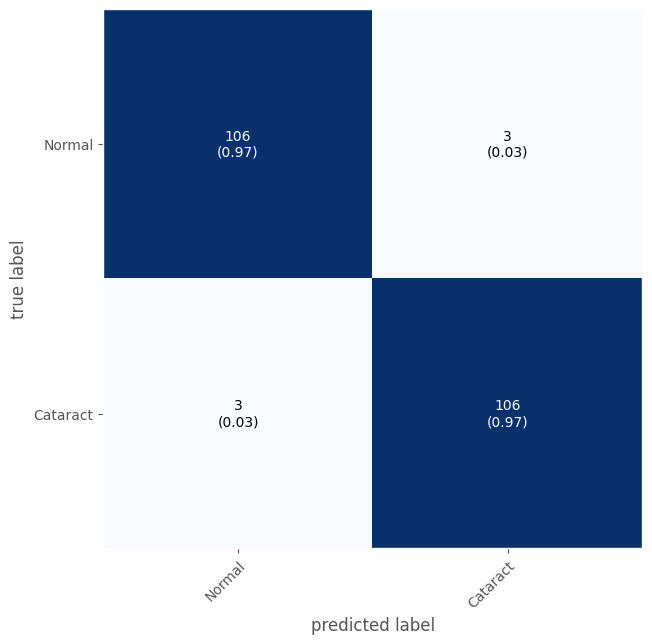

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

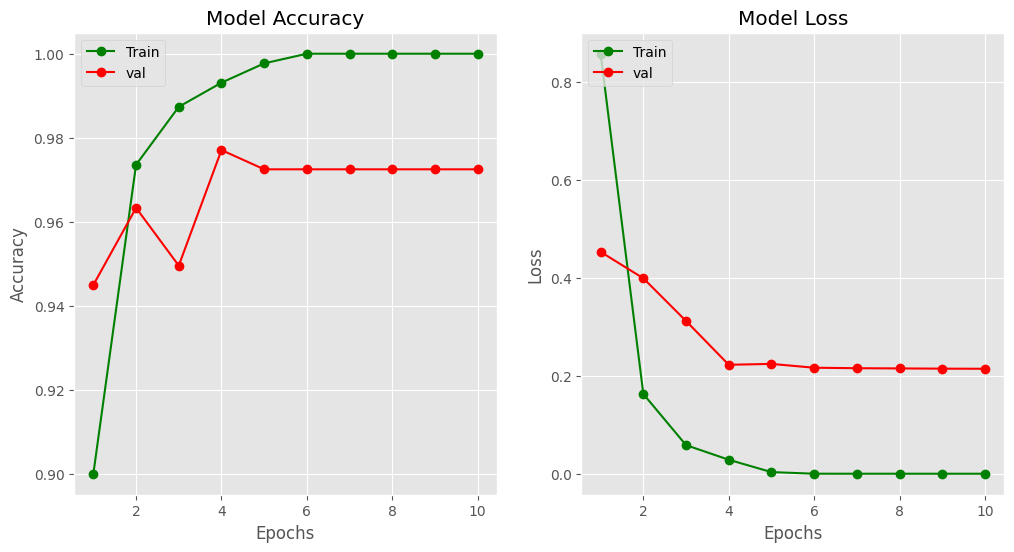

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history2.history["accuracy"],"go-")
plt.plot(epochs,history2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history2.history["loss"],"go-")
plt.plot(epochs,history2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

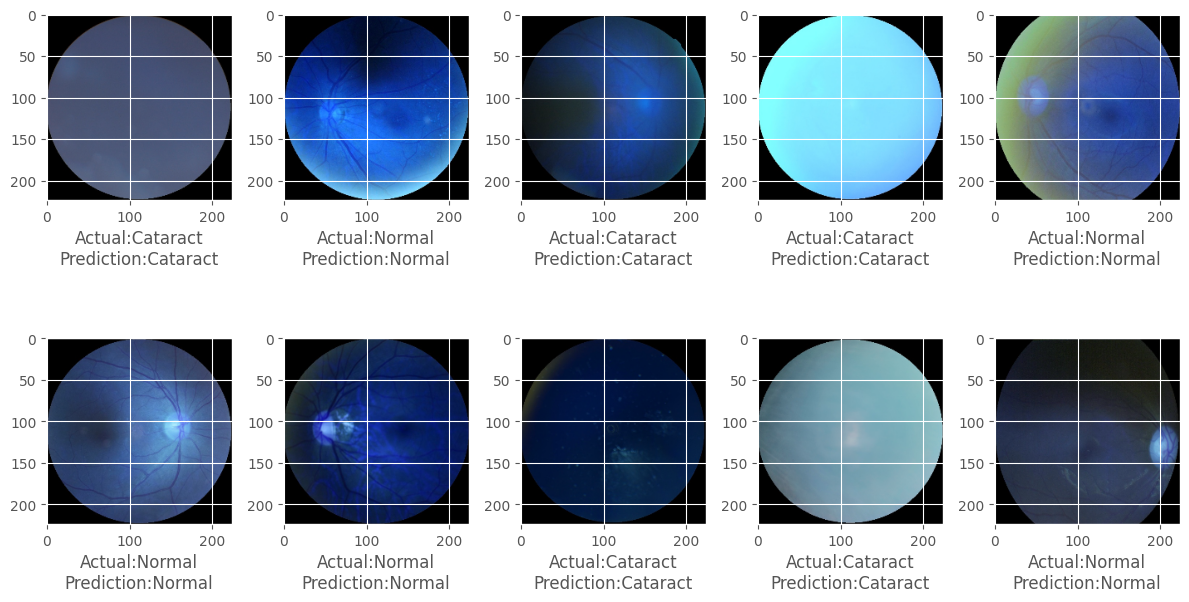

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred2[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## **VISION TRANSFORMERS** 

In [ ]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
num_classes = 2
input_shape = (224, 224, 3)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (870, 224, 224, 3) - y_train shape: (870,)
x_test shape: (218, 224, 224, 3) - y_test shape: (218,)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
image_size = 128 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 6
mlp_head_units = [512, 256]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 6 X 6
Patches per image: 441
Elements per patch: 108


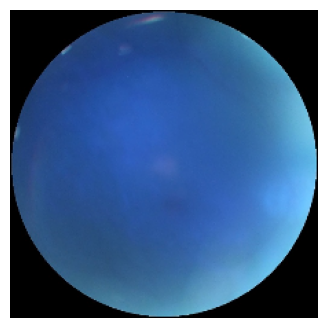

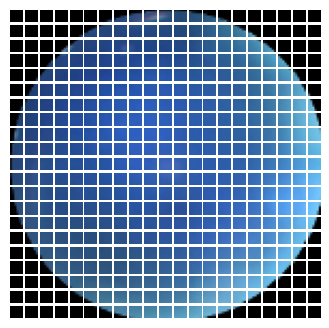

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
accloss = {'Model':['VGG19','ResNet50'],
           'Training_Accuracy':[max(history1.history['accuracy']),max(history2.history['accuracy'])],
           'Training_Loss':[min(history1.history['loss']),min(history2.history['loss'])],
           'Validation_Accuracy':[max(history1.history['val_accuracy']),max(history2.history['val_accuracy'])],
           'Validation_Loss':[min(history1.history['val_loss']),min(history2.history['val_loss'])]}

In [ ]:
accloss

{'Model': ['VGG19', 'ResNet50'],
 'Training_Accuracy': [1.0, 1.0],
 'Training_Loss': [8.469996100757271e-05, 2.6099069145857356e-05],
 'Validation_Accuracy': [0.9724770784378052, 0.9770641922950745],
 'Validation_Loss': [0.32140156626701355, 0.21430189907550812]}

In [ ]:
comp = pd.DataFrame.from_dict(accloss)
comp

,Model,Training_Accuracy,Training_Loss,Validation_Accuracy,Validation_Loss
0,VGG19,1.0,0.000085,0.972477,0.321402
1,ResNet50,1.0,0.000026,0.977064,0.214302
